<a href="https://colab.research.google.com/github/J-S-Oliveira/J-S-Oliveira/blob/main/Markowitz_Portfolio_Silmulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teoria Moderna do Portfolio de Markowitz**

Aplicação da Teoria Moderna do Portfolio (TMP), com a identificação da fronteira de eficiência, portfolio de menor risco, de maior Sharpe e da linha de mercado de capitais.


# Coleta de Dados
Os dados das ações que compõem cada índice são extraídas diretamente da B3 através do seguinte link(www.b3.com.br/pt_br/market-data-e-indices/indices/acoes-por-indice/) .Além de ultilizar como teste os dados de abertura, máximo ,mínimo e fechamento do Metatrader 5 ,vinculada a uma conta da XP investimentos.


# **Classificação Setorial | B3**

<img src="https://user-images.githubusercontent.com/70406366/181828809-89799192-d632-4edb-9970-57c5034dc88e.png" width="1200" height="8200">
<ul>

In [8]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Seleção de Ativos

Selecionando os ativos com maior liquidez do campo amostral de ativos mais líquidos serão selecionados pelos que tem a maior média de volume no período analisado.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

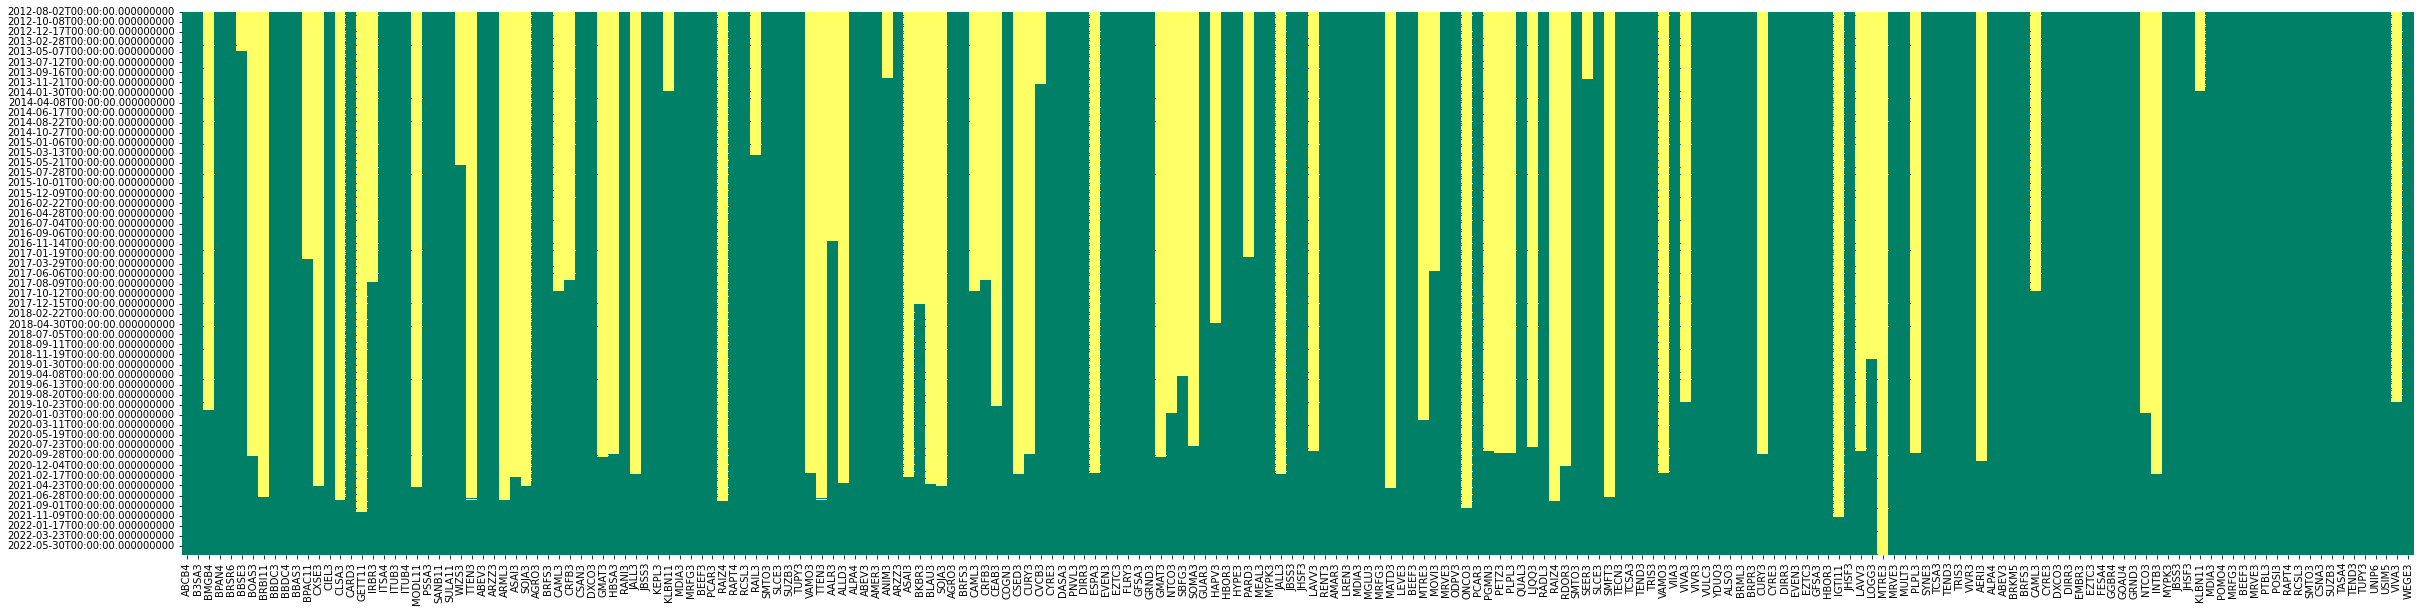

In [10]:
import requests
from lxml import etree
from io import StringIO, BytesIO
import base64
from datetime import datetime, date, timedelta

from pprint import pprint
import pandas as pd
import yfinance as yf

URL_ASSET = 'https://arquivos.b3.com.br/apinegocios/ticker/{codigo}/{iso_date}'

URL_INDEX = (
  'https://sistemaswebb3-listados.b3.com.br/indexProxy'
  '/indexCall/GetPortfolioDay/{b64_index}'
)

url = (
  'https://www.b3.com.br/pt_br/market-data-e-indices/indices/'
  'indices-de-segmentos-e-setoriais/'
)

INDEX_LIST = ['IFNC', 'AGFS', 'ICON', 'IMOB', 'INDX']

asset_data = dict()

index_asset_list = list()

def download_index_asset_list(index):
  request_dict = {
    "language": "pt-br",
    "pageNumber": 1,
    "pageSize": 100,
    "index": index,
    "segment": "1"
  }

  b64_index_dict = base64.b64encode(
      str(request_dict).encode('ascii')
  ).decode('ascii')
  
  response = requests.get(URL_INDEX.format(b64_index=b64_index_dict))
  json_data = response.json()
  asset_list = [asset.get('cod') for asset in json_data.get('results')]
  return asset_list

for index in INDEX_LIST:
  index_asset_list.extend(download_index_asset_list(index))

def download_asset_data(asset_code):
  end_date = date.today()
  start_date = (end_date - timedelta(days=10*365)).strftime('%Y-%m-%d')
  result = yf.download(
    '.'.join([asset_code, 'SA']), start=start_date, end=end_date
  )
  return result
  # pprint(result)
  

raw_stocks_quotes = pd.DataFrame()
raw_stocks_volume = pd.DataFrame()
asset_symbols = list()

for asset in index_asset_list:
  asset_data = download_asset_data(asset)

  close_price = asset_data["Adj Close"]
  volume = asset_data["Volume"]

  asset_symbols.append(asset)

  raw_stocks_quotes = pd.concat([raw_stocks_quotes, close_price], axis=1)
  raw_stocks_volume = pd.concat([raw_stocks_volume, volume], axis=1)

  raw_stocks_quotes.columns = asset_symbols
  raw_stocks_volume.columns = asset_symbols

# import pdb;pdb.set_trace()

plt.figure(figsize=(40,10))

# import pdb;pdb.set_trace()

sns.heatmap(raw_stocks_quotes.isnull(),  cbar=False, cmap = 'summer')
columns_with_na = raw_stocks_quotes.columns[raw_stocks_quotes.isnull().any()].tolist()

print("Erros: %s.\nAtivos com valores vazios: %s" % (np.sum(raw_stocks_quotes.isnull().sum()), columns_with_na))

valid_stocks_quotes = raw_stocks_quotes.dropna(axis=1)
valid_stocks_volume = raw_stocks_volume.dropna(axis=1)

qtd_stocks = 30
high_volume_stocks_sym = valid_stocks_volume.mean().sort_values(ascending=False).head(qtd_stocks).index.tolist()

stock_quotes = valid_stocks_quotes[high_volume_stocks_sym].copy()

print("Os %s ativos mais líquidos:\n%s" % (qtd_stocks, stock_quotes.columns.tolist()))






**Ativos com valores vazios:**

 ['ABCB4', 'B3SA3', 'BMGB4', 'BPAN4', 'BRSR6', 'BBSE3', 'BOAS3', 'BRBI11', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'CXSE3', 'CIEL3', 'CLSA3', 'CARD3', 'GETT11', 'IRBR3', 'ITSA4', 'ITUB3', 'ITUB4', 'MODL11', 'PSSA3', 'SANB11', 'SULA11', 'WIZS3', 'TTEN3', 'ABEV3', 'ARZZ3', 'ARML3', 'ASAI3', 'SOJA3', 'AGRO3', 'BRFS3', 'CAML3', 'CRFB3', 'CSAN3', 'DXCO3', 'GMAT3', 'HBSA3', 'RANI3', 'JALL3', 'JBSS3', 'KEPL3', 'KLBN11', 'MDIA3', 'MRFG3', 'BEEF3', 'PCAR3', 'RAIZ4', 'RAPT4', 'RCSL3', 'RAIL3', 'SMTO3', 'SLCE3', 'SUZB3', 'TUPY3', 'VAMO3', 'TTEN3', 'AALR3', 'ALLD3', 'ALPA4', 'ABEV3', 'AMER3', 'ANIM3', 'ARZZ3', 'ASAI3', 'BKBR3', 'BLAU3', 'SOJA3', 'AGRO3', 'BRFS3', 'CAML3', 'CRFB3', 'CEAB3', 'COGN3', 'CSED3', 'CURY3', 'CVCB3', 'CYRE3', 'DASA3', 'PNVL3', 'DIRR3', 'ESPA3', 'EVEN3', 'EZTC3', 'FLRY3', 'GFSA3', 'GRND3', 'GMAT3', 'NTCO3', 'SBFG3', 'SOMA3', 'GUAR3', 'HAPV3', 'HBOR3', 'HYPE3', 'PARD3', 'MEAL3', 'MYPK3', 'JALL3', 'JBSS3', 'JHSF3', 'LAVV3', 'RENT3', 'AMAR3', 'LREN3', 'MDIA3', 'MGLU3', 'MRFG3', 'MATD3', 'LEVE3', 'BEEF3', 'MTRE3', 'MOVI3', 'MRVE3', 'ODPV3', 'ONCO3', 'PCAR3', 'PGMN3', 'PETZ3', 'PLPL3', 'QUAL3', 'LJQQ3', 'RADL3', 'RAIZ4', 'RDOR3', 'SMTO3', 'SEER3', 'SLCE3', 'SMFT3', 'TECN3', 'TCSA3', 'TEND3', 'TRIS3', 'VAMO3', 'VIIA3', 'VIVA3', 'VIVR3', 'VULC3', 'YDUQ3', 'ALSO3', 'BRML3', 'BRPR3', 'CURY3', 'CYRE3', 'DIRR3', 'EVEN3', 'EZTC3', 'GFSA3', 'HBOR3', 'IGTI11', 'JHSF3', 'LAVV3', 'LOGG3', 'MTRE3', 'MRVE3', 'MULT3', 'PLPL3', 'SYNE3', 'TCSA3', 'TEND3', 'TRIS3', 'VIVR3', 'AERI3', 'ALPA4', 'ABEV3', 'BRKM5', 'BRFS3', 'CAML3', 'CYRE3', 'DXCO3', 'DIRR3', 'EMBR3', 'EZTC3', 'FESA4', 'GGBR4', 'GOAU4', 'GRND3', 'NTCO3', 'INTB3', 'MYPK3', 'JBSS3', 'JHSF3', 'KLBN11', 'MDIA3', 'POMO4', 'MRFG3', 'BEEF3', 'MRVE3', 'PTBL3', 'POSI3', 'RAPT4', 'RCSL3', 'SMTO3', 'CSNA3', 'SUZB3', 'TASA4', 'TEND3', 'TUPY3', 'UNIP6', 'USIM5', 'VIVA3', 'WEGE3']


# Amostras de treinamento e outras de teste

In [11]:
from datetime import datetime
initial_date_train = stock_quotes.index.min()
final_date_train = datetime(year=2022, month=7, day=31)

train_stocks = stock_quotes[(stock_quotes.index >= initial_date_train) & (stock_quotes.index <= final_date_train)].copy()
initial_date_test = datetime(year=2019, month=9, day=2)
final_date_test = stock_quotes.index.max()

test_stocks = stock_quotes[(stock_quotes.index >= initial_date_test) & (stock_quotes.index <= final_date_test)].copy()

# Clusterização  K-Means
Aplicando  uma clusterização não supervisionada e separando  um ativo para cada cluster  como critério o índice Sharpe

In [12]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

A rentabilidade diária de cada ativo.

In [13]:


train_return_pct = 100 * train_stocks.pct_change()



Desvio padrão e a média de rentabilidade diária de cada ativo.

In [14]:
stocks_sym = train_return_pct.columns

X = np.array([[np.std(train_return_pct[st]), np.mean(train_return_pct[st])] for st in stocks_sym])

In [15]:

stocks_sym = train_return_pct.columns

X = np.array([[np.std(train_return_pct[st]), np.mean(train_return_pct[st])] for st in stocks_sym])



**Step 01** Para análise dos clusters

In [26]:
def elbow_analysis(X, type_dataset):
    inertias_X = []

    for i in range(1, 30):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        inertias_X.append(kmeans.inertia_)

    plt.plot(range(1, 30), inertias_X)
    plt.title('Análise de Elbow %s' % type_dataset)
    plt.xlabel('Número de clusters')
    plt.ylabel('WCSS')
    plt.show()



In [17]:
def cluster_analysis(X, num_clusters, type_dataset='', plot=True):

    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
    y_predict = kmeans.predict(X)

    centers = kmeans.cluster_centers_
    
    if(plot):
        plt.scatter(X[:, 0], X[:, 1], c=y_predict)
        print("Silhoutte score: %s"% silhouette_score(X, y_predict))
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2)
        plt.title('Clusterização valores %s' % type_dataset)
        plt.show()
    
    return kmeans, y_predict

# Portifolio Markowitz



In [33]:
tickers = ['MGLU3.SA', 'ABEV3.SA']
periodo = '10y'  # Opções: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
                  #10 ÚLTIMOS ANOS

In [34]:
!pip install -q yfinance

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np

import plotly.graph_objects as go

from ipywidgets import interact

In [36]:
def fix_col_names(df):
  return ['IBOV' if col =='^BVSP' else col.rstrip('.SA') for col in df.columns]

In [37]:
prices = yf.download(tickers, period=periodo, rounding=True )['Adj Close']
prices.columns = fix_col_names(prices)
prices.dropna(inplace=True)
retorno = prices.pct_change().dropna()
ativos = retorno.columns.to_list()

[*********************100%***********************]  2 of 2 completed


In [38]:
retorno.tail()

,ABEV3,MGLU3
Date,,
2022-07-26,0.009537,-0.064516
2022-07-27,0.010796,0.034483
2022-07-28,0.008011,0.007407
2022-07-29,-0.011258,-0.051471
2022-08-01,-0.021433,0.003876


In [39]:
def calcula_carteira(df, w1):
  pesos = [w1,(1-w1)]  
  df2 = df.dot(pesos).copy()
  return  df2.mean() * 252, df2.std() * np.sqrt(252)

In [40]:
prices.tail()

,ABEV3,MGLU3
Date,,
2022-07-26,14.82,2.61
2022-07-27,14.98,2.70
2022-07-28,15.10,2.72
2022-07-29,14.93,2.58
2022-08-01,14.61,2.59


# Criando 100 carteiras de dois ativos com pesos variáveis

In [41]:
# Criando 100 carteiras de dois ativos com pesos variáveis
carteira = pd.DataFrame()
for i in np.linspace(0,1, 101):
  media, std = calcula_carteira(retorno,i)
  carteira.at[i,'retorno'] = media
  carteira.at[i,'volatilidade'] = std

carteira

,retorno,volatilidade
0.00,0.408585,0.620607
0.01,0.405357,0.615011
0.02,0.402130,0.609426
0.03,0.398903,0.603853
0.04,0.395675,0.598293
...,...,...
0.96,0.098758,0.266690
0.97,0.095530,0.267530
0.98,0.092303,0.268511
0.99,0.089076,0.269631


# Carteira de volatilidade mínima

In [42]:
# 
min_vol_idx = carteira['volatilidade'].idxmin()

# Cálculo a fronteira eficiente

In [43]:

if (carteira['retorno'].iloc[0] > carteira['retorno'].iloc[-1]):
  fe = carteira.loc[:min_vol_idx, :]
else:
  fe = carteira.loc[min_vol_idx:, :]

# Gráfico

In [44]:
def gerar_grafico(w1, mostrar_curvas):
  fig = go.Figure()

  # Desenha um ponto com o retorno e a volatilidade da carteira
  fig.add_scatter(y=[carteira.iloc[w1]['retorno']], 
                  x=[carteira.iloc[w1]['volatilidade']], 
                  text=['CARTEIRA'],
                  mode='markers+text', name='CARTEIRA')
  
  # Desenha os pontos das ações individuais
  fig.add_scatter(y=carteira.iloc[[-1,0]]['retorno'], 
                  x=carteira.iloc[[-1,0]]['volatilidade'], 
                  text=ativos,
                  mode='markers+text', name='Ações')
  
  # Desenha a curva
  fig.add_scatter(y=carteira['retorno'], 
                  x=carteira['volatilidade'],                  
                  mode='lines', name='Curva', 
                  visible=mostrar_curvas)

  # Plota carteira de volatilidade mínima   
  fig.add_scatter(y=[carteira.loc[min_vol_idx]['retorno']], 
                  x=[carteira.loc[min_vol_idx]['volatilidade']],                  
                  mode='markers', 
                  name='Carteira de Mínima Variância',
                  visible=mostrar_curvas)
      
  # Desenha a fronteira eficiente
  fig.add_scatter(y=fe['retorno'], 
                  x=fe['volatilidade'],                  
                  mode='lines', name='Fronteira Eficiente', 
                  line={'color':'red'},
                  visible=mostrar_curvas)
                
  fig.update_traces(textfont_size=12, 
                  textposition='top center', 
                  textfont_color='white',
                  hovertemplate='<b>retorno: </b> %{y:.1%}'+
                                '<br><b>volatilidade:</b> %{x:.1%}')
  fig.layout.autosize = False
  fig.layout.xaxis.title='Volatilidade'
  fig.layout.yaxis.title='Retorno Esperado'
  fig.layout.xaxis.range = [carteira['volatilidade'].min()-0.05, carteira['volatilidade'].max()+0.05]
  fig.layout.yaxis.range = [carteira['retorno'].min()-0.05, carteira['retorno'].max()+0.05]
  fig.layout.xaxis.tickformat = '.0%'
  fig.layout.yaxis.tickformat = '.0%'
  fig.layout.title = f"<b>{ativos[0]}:</b> {w1}%  <b>{ativos[1]}:</b> {100-w1}%"
  fig.layout.template = 'plotly_dark'
                   
  fig.show(config=dict(
                    displayModeBar=True
                ))

interact(gerar_grafico, w1=(0,100, 1), mostrar_curvas=False);

interactive(children=(IntSlider(value=50, description='w1'), Checkbox(value=False, description='mostrar_curvas…

# Implementação Walk Forward

In [45]:
!pip install investpy
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 235 kB 47.6 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=69e071fafd888bfe14fac42583077c65243efa64be894ec95dd5637627350b9e
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import investpy
import matplotlib.dates as mdates
from scipy import signal
import yfinance as yf
from tqdm.notebook import tqdm
import datetime as dt
plt.style.use('dark_background')

In [48]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
symbols=[sy+".sa" for sy in symbols[:-1]]
np.array(symbols)

array(['ABEV3.sa', 'ASAI3.sa', 'AZUL4.sa', 'B3SA3.sa', 'BBAS3.sa',
       'BBDC3.sa', 'BBDC4.sa', 'BBSE3.sa', 'BEEF3.sa', 'BPAC11.sa',
       'BRAP4.sa', 'BRDT3.sa', 'BRFS3.sa', 'BRKM5.sa', 'BRML3.sa',
       'BTOW3.sa', 'CCRO3.sa', 'CIEL3.sa', 'CMIG4.sa', 'COGN3.sa',
       'CPFE3.sa', 'CPLE6.sa', 'CRFB3.sa', 'CSAN3.sa', 'CSNA3.sa',
       'CVCB3.sa', 'CYRE3.sa', 'ECOR3.sa', 'EGIE3.sa', 'ELET3.sa',
       'ELET6.sa', 'EMBR3.sa', 'ENBR3.sa', 'ENEV3.sa', 'ENGI11.sa',
       'EQTL3.sa', 'EZTC3.sa', 'FLRY3.sa', 'GGBR4.sa', 'GNDI3.sa',
       'GOAU4.sa', 'GOLL4.sa', 'HAPV3.sa', 'HGTX3.sa', 'HYPE3.sa',
       'IGTA3.sa', 'IRBR3.sa', 'ITSA4.sa', 'ITUB4.sa', 'JBSS3.sa',
       'JHSF3.sa', 'KLBN11.sa', 'LAME4.sa', 'LCAM3.sa', 'LREN3.sa',
       'MGLU3.sa', 'MRFG3.sa', 'MRVE3.sa', 'MULT3.sa', 'NTCO3.sa',
       'PCAR3.sa', 'PETR3.sa', 'PETR4.sa', 'PRIO3.sa', 'QUAL3.sa',
       'RADL3.sa', 'RAIL3.sa', 'RENT3.sa', 'SANB11.sa', 'SBSP3.sa',
       'SULA11.sa', 'SUZB3.sa', 'TAEE11.sa', 'TIMS3.sa', '

In [49]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:4]]
    return df

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=10*365)
print(todayB,yesterdayB)

outClose= pd.DataFrame()
cols=[]

for symbol in tqdm(symbols):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
    
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)

        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
output=outClose.copy()

2022-08-01 2012-08-03


  0%|          | 0/82 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRDT3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

In [53]:
output

,ABEV3.sa,ASAI3.sa,AZUL4.sa,B3SA3.sa,BBAS3.sa,BBDC3.sa,BBDC4.sa,BBSE3.sa,BEEF3.sa,BPAC11.sa,...,TAEE11.sa,TIMS3.sa,TOTS3.sa,UGPA3.sa,USIM5.sa,VALE3.sa,VIVT3.sa,VVAR3.sa,WEGE3.sa,YDUQ3.sa
2012-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-03,12.664708,NaN,NaN,3.986666,23.120001,9.402670,11.506858,NaN,9.478961,NaN,...,22.833332,8.88,12.453005,24.150000,7.90,37.299999,44.150002,NaN,2.815088,8.566666
2012-08-06,12.858688,NaN,NaN,4.000000,23.830000,9.704038,11.767000,NaN,9.754284,NaN,...,23.496666,9.03,12.516219,24.150000,8.52,37.700001,44.439999,NaN,2.847633,8.566666
2012-08-07,12.704704,NaN,NaN,3.930000,23.549999,9.693401,11.884599,NaN,9.675620,NaN,...,23.629999,8.70,13.075157,23.410000,7.80,37.639999,43.610001,NaN,2.877218,8.566666
2012-08-08,12.698704,NaN,NaN,3.926666,23.879999,9.785584,12.044961,NaN,9.685453,NaN,...,23.200001,8.81,13.108427,23.049999,8.25,37.930000,44.779999,NaN,2.840236,8.566666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,14.680000,15.500000,11.46,10.730000,35.200001,14.310000,17.280001,28.230000,13.510000,22.610001,...,40.619999,12.65,25.850000,12.790000,8.98,70.489998,46.419998,NaN,26.480000,13.540000
2022-07-26,14.820000,15.520000,11.07,10.730000,35.320000,14.280000,17.160000,28.410000,13.250000,21.830000,...,40.410000,12.60,25.080000,12.440000,8.79,70.360001,46.389999,NaN,26.200001,12.910000
2022-07-27,14.980000,16.360001,11.61,10.880000,35.549999,14.360000,17.260000,28.799999,13.610000,22.260000,...,40.450001,12.40,26.139999,12.890000,8.88,70.519997,44.900002,NaN,26.870001,13.840000
2022-07-28,15.100000,16.190001,11.80,11.260000,36.209999,14.420000,17.389999,28.870001,13.270000,22.760000,...,40.590000,12.63,26.379999,12.770000,9.04,70.690002,44.880001,NaN,27.930000,13.530000


In [54]:
anos=sorted(list(set(output.index.year)))
treino=[[a,a+1,a+2] for a in anos[:-3]]
teste=anos[3:]

for tr,te in zip(treino[:7],teste[:7]):
    
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))

[2012, 2013, 2014] [2015]
[2013, 2014, 2015] [2016]
[2014, 2015, 2016] [2017]
[2015, 2016, 2017] [2018]
[2016, 2017, 2018] [2019]
[2017, 2018, 2019] [2020]
[2018, 2019, 2020] [2021]


In [55]:
ativos=[13,22,50]

in_sample=tr_aux[tr_aux.columns[ativos]] # k-means
in_sample

,BRKM5.sa,CRFB3.sa,JHSF3.sa
2018-01-02,43.860001,15.490000,1.80
2018-01-03,43.490002,15.390000,1.87
2018-01-04,44.150002,15.110000,1.91
2018-01-05,45.220001,15.000000,1.91
2018-01-08,45.299999,14.610000,1.91
...,...,...,...
2020-12-22,23.070000,19.190001,7.47
2020-12-23,23.240000,19.219999,7.50
2020-12-28,23.030001,19.469999,7.65
2020-12-29,23.389999,19.600000,7.65


In [56]:
out_sample=te_aux[tr_aux.columns[ativos]] # k-means
out_sample

,BRKM5.sa,CRFB3.sa,JHSF3.sa
2021-01-04,23.350000,19.150000,7.44
2021-01-05,23.360001,19.020000,7.36
2021-01-06,24.270000,18.950001,7.07
2021-01-07,24.870001,18.809999,7.02
2021-01-08,24.690001,19.500000,7.40
...,...,...,...
2021-12-23,57.240002,15.390000,5.41
2021-12-27,57.369999,15.470000,5.54
2021-12-28,57.290001,15.210000,5.59
2021-12-29,57.290001,14.920000,5.49


In [57]:
pesos=[0.35, 0.25, 0.4] # Markowitz
np.sum(pesos)

1.0

In [58]:
capital=100000

st_in_1=round(pesos[0]*capital/in_sample[in_sample.columns[0]].iloc[0])
st_in_2=round(pesos[1]*capital/in_sample[in_sample.columns[1]].iloc[0])
st_in_3=round(pesos[2]*capital/in_sample[in_sample.columns[2]].iloc[0])
st_in=[st_in_1,st_in_2,st_in_3]
st_in

[798, 1614, 22222]

In [59]:
# Capital Primeiro Dia in sample
np.sum([in_sample[in_sample.columns[i]].iloc[0]*st for i,st in zip(range(3),st_in)])

100000.73905801773

In [60]:
# Capital Ultimo dia in_Sample
np.sum([in_sample[in_sample.columns[i]].iloc[-1]*st for i,st in zip(range(3),st_in)])

223658.13749980927

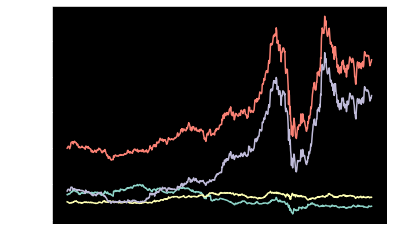

In [61]:
port=[]
for i,st in zip(range(3),st_in): 
    res=in_sample[in_sample.columns[i]].values*st
    port.append(res)
    plt.plot(res)
plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values)

In [62]:
st_out_1=round(pesos[0]*capital/out_sample[out_sample.columns[0]].iloc[0])
st_out_2=round(pesos[1]*capital/out_sample[out_sample.columns[1]].iloc[0])
st_out_3=round(pesos[2]*capital/out_sample[out_sample.columns[2]].iloc[0])
st_out=[st_out_1,st_out_2,st_out_3]
st_out

[1499, 1305, 5376]

In [64]:
# Capital Primeiro Dia out of sample
np.sum([out_sample[out_sample.columns[i]].iloc[0]*st for i,st in zip(range(3),st_out)])

99989.84038162231

In [65]:
# Ultimo Primeiro Dia out of sample
np.sum([out_sample[out_sample.columns[i]].iloc[-1]*st for i,st in zip(range(3),st_out)])

136286.7011909485

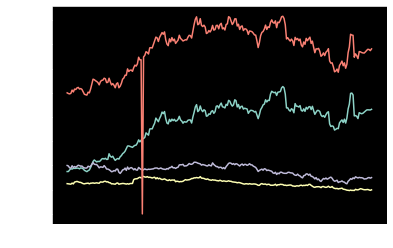

In [66]:
port=[]
for i,st in zip(range(3),st_out): 
    res=out_sample[out_sample.columns[i]].values*st
    port.append(res)
    plt.plot(res)
plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values)

In [67]:
out_sample

,BRKM5.sa,CRFB3.sa,JHSF3.sa
2021-01-04,23.350000,19.150000,7.44
2021-01-05,23.360001,19.020000,7.36
2021-01-06,24.270000,18.950001,7.07
2021-01-07,24.870001,18.809999,7.02
2021-01-08,24.690001,19.500000,7.40
...,...,...,...
2021-12-23,57.240002,15.390000,5.41
2021-12-27,57.369999,15.470000,5.54
2021-12-28,57.290001,15.210000,5.59
2021-12-29,57.290001,14.920000,5.49
